In [5]:
# Plot Surrogate Predictions
from gp_predict import *
import pandas as pd
import numpy as np
from diff_evolution_col import *

In [6]:
ii = 0

# Here, call surrogate model
surrogate_dir = r'C:\Users\Miguel.MIGUEL-DESK\Documents\GitHub\RC_Column_Model\quoFEM_Surrogate\flexure_pd_010_just_good_data'
template_dir = os.path.join(surrogate_dir, 'templatedir_SIM')

surrogate_file = surrogate_dir + r'\SimGpModel.json'
# json_dir = template_dir + r'\scInput.json'
# result_file = template_dir + r'\ops.out'
input_json = r'C:\Users\Miguel.MIGUEL-DESK\Documents\GitHub\RC_Column_Model\quoFEM_Surrogate\scInput.json'


In [7]:
# load the merged_data.csv file
merged_data = pd.read_csv(surrogate_dir + r'\test_data.csv')

cal_params_index = np.arange(0, 14)
nd_params_index = np.arange(17, 23)

# Extract the calibrated and nondimensional parameters for both training and testing
cal_params_all = merged_data.iloc[:, cal_params_index]
nondim_params_all = merged_data.iloc[:, nd_params_index]


merged_data

eta1   kappa_k     kappa       sig       lam       mup      sigp  \
0   1.268766  0.560342  0.989811  0.422157  0.508888  0.289958  0.655478   
1   1.302573  0.664521  1.019830  0.295417  0.379802  0.197480  0.396008   
2   1.081939  1.690771  0.998811  0.344018  0.469761  0.716281  1.547362   
3   0.519748  1.073142  1.006206  0.373530  0.341981  0.334443  0.679440   
4   0.707529  1.838275  1.049884  0.204735  0.383226  3.123346  2.097244   
5   1.478835  5.314510  0.976617  0.386420  0.748542  2.441889  0.314088   
6   1.960111  0.621526  0.952017  0.260403  0.484648  0.964714  0.806099   
7   0.695294  0.626197  1.010386  0.563346  0.214474  1.070838  1.863670   
8   0.733326  0.622361  1.013984  0.392674  0.543617  0.630620  0.564946   
9   1.875975  0.842865  1.010454  0.381268  0.626903  1.352073  0.434545   
10  1.281545  0.525599  0.982592  0.445329  0.778981  0.829192  1.036181   
11  1.391915  1.512064  0.983977  0.510173  0.414738  1.331999  2.827115   
12  1.089789  0.525902  0.981779  0.294387  0.782606  1.794900  0.719936   
13  1.546731  0.510748  1.034338  0.274254  0.245377  0.618565  1.453428   
14  1.305234  0.954732  0.989196  0.182335  0.359528  0.638137  1.332989   
15  1.048237  1.007354  1.013924  0.289534  0.490757  1.489009  1.427118   
16  1.617294  0.551926  1.017993  0.142420  0.649311  1.039210  0.494608   
17  0.716438  2.715847  0.950000  0.305016  0.313669  4.002657  2.323907   
18  1.814607  3.214560  0.950189  0.345152  0.704078  3.120491  3.283974   
19  1.602001  0.904862  1.019801  0.534666  0.467467  0.123933  0.723629   
20  1.518128  1.346261  0.993382  0.719039  0.546238  1.206218  0.403618   
21  0.914518  0.670434  0.992958  0.515374  0.939003  2.117709  0.922484   
22  1.679122  1.137317  1.028857  0.226824  0.739213  3.971343  0.943830   
23  1.173098  0.681198  0.995999  0.904197  0.627057  1.162311  0.420907   
24  1.923815  0.521169  0.983361  0.338396  0.706969  1.240888  0.100000   
25  1.656986  1.343592  1.033882  0.282916  0.586252  1.328925  0.827041   
26  1.462456  2.048799  0.964233  0.416570  0.403904  1.856996  1.457159   
27  0.841848  0.881738  1.013899  0.268190  0.492126  1.431083  0.672626   
28  1.278782  1.569304  1.005204  0.392483  0.824677  1.627523  0.994798   
29  1.042688  1.648638  1.015681  0.662715  0.839443  1.878187  1.674908   
30  1.942626  1.302992  1.019556  0.314960  0.825297  1.277868  1.967918   
31  0.895935  1.997405  1.024065  0.741360  0.440337  0.585286  0.203604   
32  1.602704  1.364962  0.951066  0.399237  0.439117  1.816974  0.538779   
33  0.836668  0.713672  1.004700  0.275674  0.413689  0.343253  1.092408   
34  1.783299  1.509977  0.986828  0.238450  0.648751  0.387547  3.434317   
35  1.021717  0.633137  1.015196  0.901402  0.917541  1.211106  0.161693   
36  1.747561  2.008421  1.022850  0.183363  0.645888  1.054350  3.402308   
37  1.739878  2.419327  1.015052  0.374199  0.531291  3.617607  1.611245   
38  1.138895  0.615178  0.990485  0.127393  0.607689  0.419765  1.385741   
39  1.523620  2.397029  0.975643  0.728096  0.277300  0.191845  1.337467   
40  0.879324  1.432476  1.050000  0.405963  0.373559  0.345261  0.597285   
41  0.968242  0.757702  0.975475  0.333439  0.438582  1.176180  2.456288   
42  1.808158  5.633029  0.983798  0.252915  0.501056  0.706601  1.723137   
43  1.031460  0.657873  0.992729  0.403147  0.342366  1.518177  0.713954   
44  1.289387  0.922414  1.004434  0.455837  0.522676  4.532944  2.270493   
45  1.735049  0.517715  0.992784  0.558042  0.832150  1.128218  0.891015   
46  1.851018  0.518395  1.008477  0.301552  0.324587  4.589183  3.117150   
47  2.000000  2.536811  1.020588  0.253754  0.356539  1.567047  1.343950   

       rsmax         n     alpha  ...     gamma  \
0   0.538570  6.108898  0.013199  ...  1.921804   
1   0.541934  6.798783  0.010121  ...  1.467695   
2   0.550237  1.718216  0.008190  ...  1.322453   
3   0.983444  2.987563  0.000982  ...  0.338498   
4   0.557611  5.624242  0.00

Name not found
Name not found
C:\Users\Miguel.MIGUEL-DESK\Documents\GitHub\RC_Column_Model\quoFEM_Surrogate\scInput.json
1
[1.340101875, 3.6345309414365925, 0.9831151688953719, 0.3391749422020992, 0.7325398811320925, 1.6027248837567885, 0.5692899487653987, 0.6301471502749648, 3.0595620052229773, 0.01067624987221549, 5.149252901004467, 1.0114804507029684, 0.005862562103957711, 1.2949766914486647]


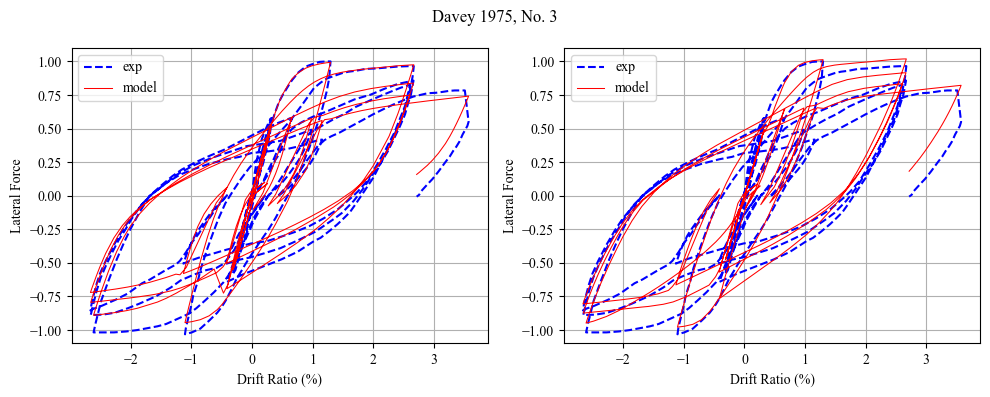



C:\Users\Miguel.MIGUEL-DESK\Documents\GitHub\RC_Column_Model\quoFEM_Surrogate\scInput.json
1
[1.340101875, 0.8422827241676121, 1.0144235950183005, 0.2711964581662877, 0.6431889854968169, 1.36120280351195, 0.6951975532573951, 0.5753369048705365, 3.042258556249106, 0.01067624987238529, 4.297976152747723, 0.978489461461092, 0.006345486213030743, 1.4215409336220213]


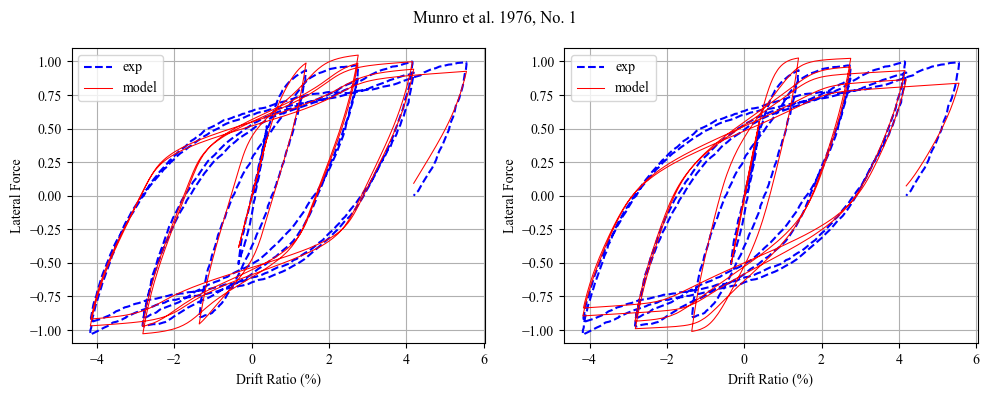



C:\Users\Miguel.MIGUEL-DESK\Documents\GitHub\RC_Column_Model\quoFEM_Surrogate\scInput.json
1
[1.340101875, 0.8120946706016865, 0.9932981769724396, 0.3025635995918316, 0.604561570698838, 1.3759409707962356, 1.321938830533491, 0.8939421683100597, 2.161495955637884, 0.01067624988593784, 5.8404943067423645, 0.6397020224686433, 0.0054434066503944055, 0.8519742467295959]


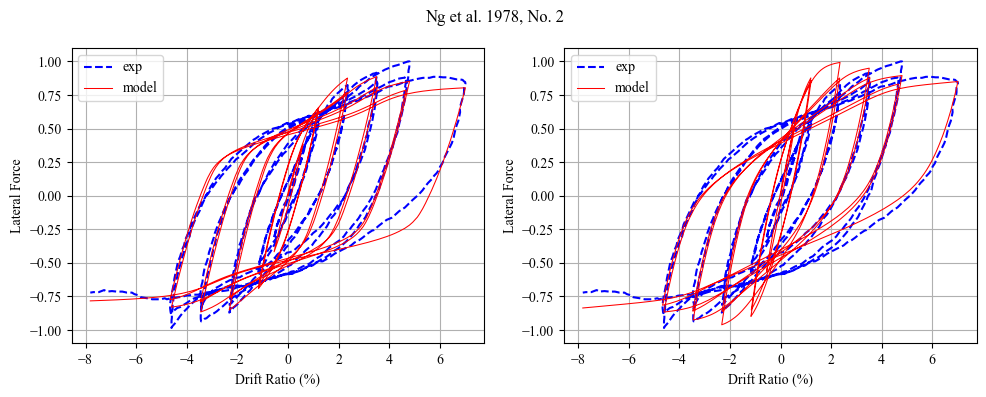



Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
C:\Users\Miguel.MIGUEL-DESK\Documents\GitHub\RC_Column_Model\quoFEM_Surrogate\scInput.json
1
[1.340101875, 1.2855982501721737, 1.015009900280205, 0.4580712457234273, 0.47109025538670024, 1.2652857850633805, 0.9680095529706012, 0.8316751998948257, 1.9879415790252326, 0.010676250136237755, 3.7502784350069565, 0.8488070674687935, 0.017389334705627348, 1.0541915996915088]


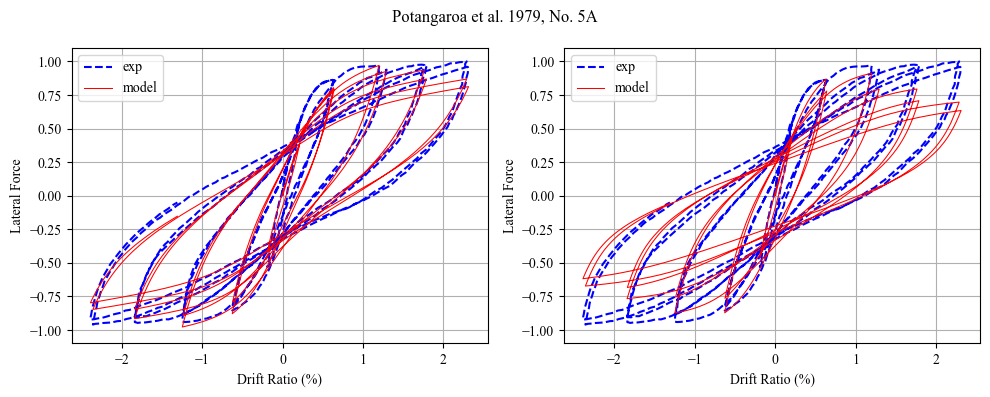



Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
C:\Users\Miguel.MIGUEL-DESK\Documents\GitHub\RC_Column_Model\quoFEM_Surrogate\scInput.json
1
[1.340101875, 1.7979325859248032, 0.9643013671348986, 0.33274868584497036, 0.4442460031541279, 2.0075810182449176, 0.9872667745002627, 0.441980708304626, 3.1620958293007875, 0.01067624988751015, 4.290967598359976, 0.5341960310672624, 0.0052343458971823124, 0.9489304004853628]


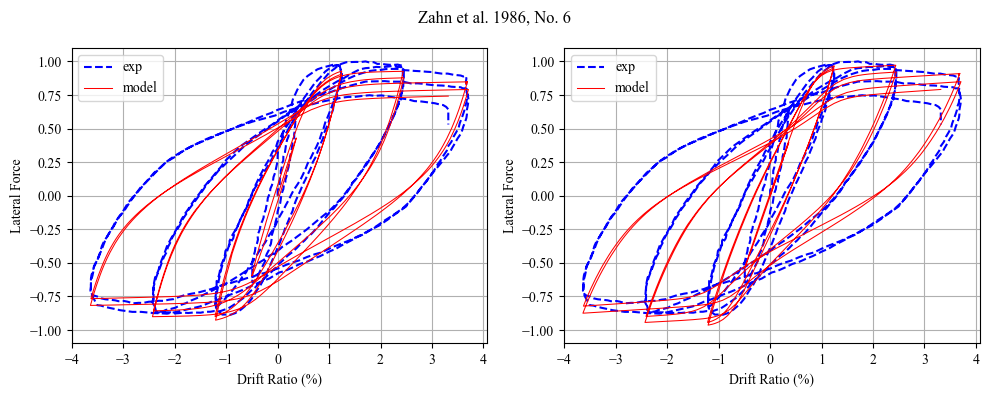



C:\Users\Miguel.MIGUEL-DESK\Documents\GitHub\RC_Column_Model\quoFEM_Surrogate\scInput.json
1
[1.340101875, 2.074209157349576, 0.9823564789409545, 0.5398956711221256, 0.30115867281429387, 1.3404896325119073, 1.3226299366156844, 0.9035460847046826, 2.1784967513710876, 0.010676250069551247, 4.406471773266453, 0.7193127986672364, 0.012058686131983638, 1.4537162631032916]


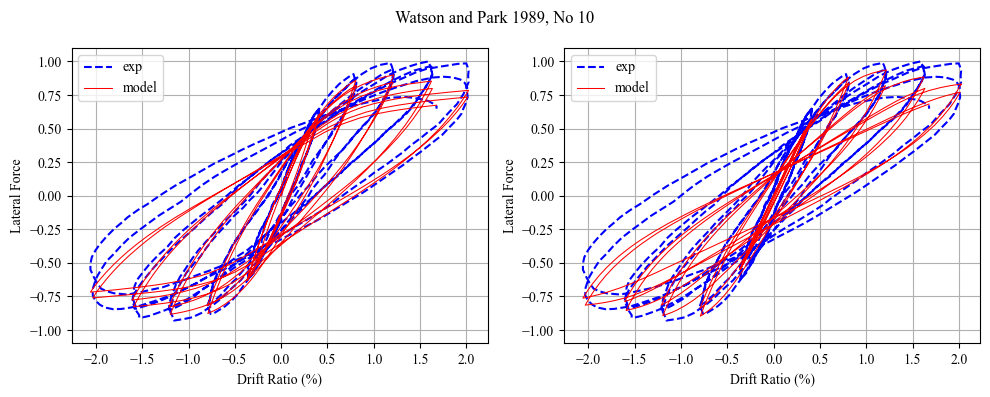



Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
C:\Users\Miguel.MIGUEL-DESK\Documents\GitHub\RC_Column_Model\quoFEM_Surrogate\scInput.json
1
[1.340101875, 0.747973104848046, 0.9894700370077223, 0.37454197543777207, 0.6990715795869564, 1.4060766805158245, 0.6397182575394965, 0.7088354700622822, 2.8177064486645564, 0.010676249958125602, 6.2454040012116625, 0.7878225180941631, 0.0035433461299177386, 1.0674432573979664]


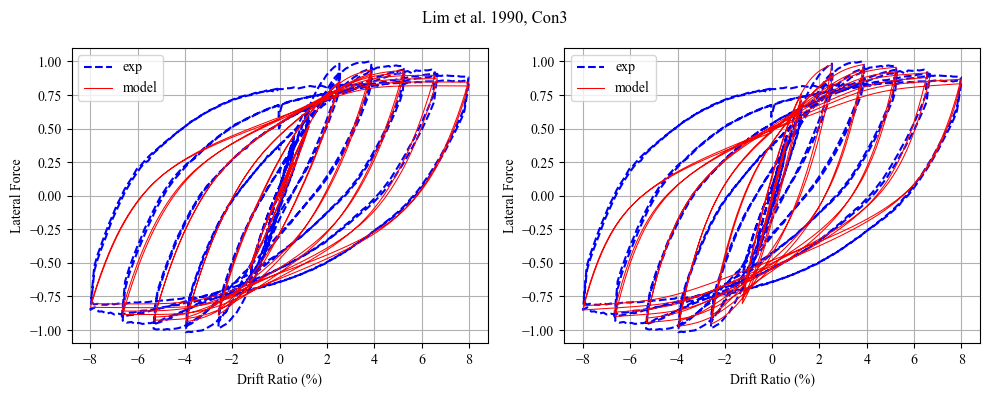



C:\Users\Miguel.MIGUEL-DESK\Documents\GitHub\RC_Column_Model\quoFEM_Surrogate\scInput.json
1
[1.340101875, 0.7479731048479561, 0.9906285210460662, 0.4639005280998006, 0.8182309467498416, 1.406053504674308, 0.6397182575394965, 0.7675245563541011, 2.3737899639132456, 0.010676250083040139, 4.45868607503223, 0.7103350269914354, 0.004410697582140067, 1.0674432575029946]


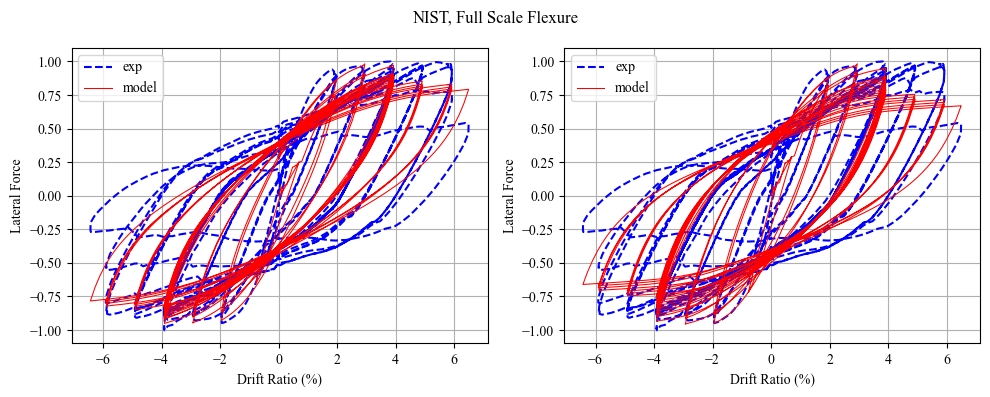



C:\Users\Miguel.MIGUEL-DESK\Documents\GitHub\RC_Column_Model\quoFEM_Surrogate\scInput.json
1
[1.340101875, 0.6965962934602329, 0.9971116704771448, 0.3435491454134336, 0.9213581881957249, 1.8817159350995625, 1.0236326171859547, 0.5032550186278583, 2.1381721438818646, 0.010676249871762727, 4.51491947507939, 0.8282124529647339, 0.007032879147711181, 0.6561128708809207]


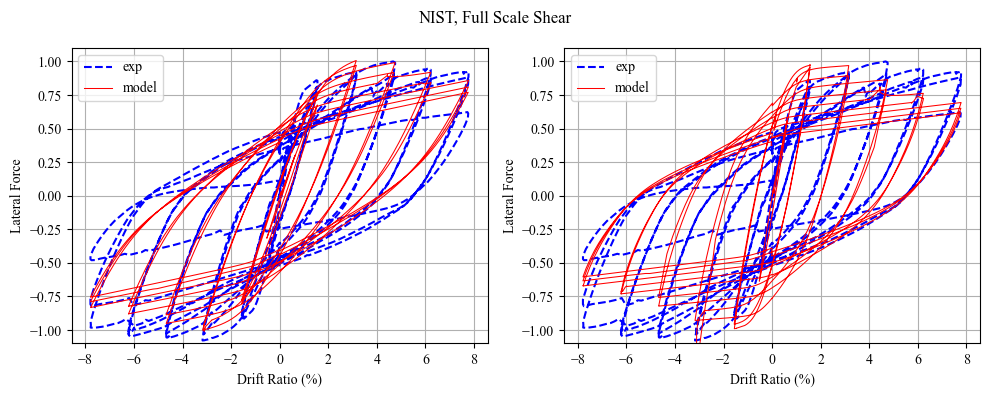



Name not found
C:\Users\Miguel.MIGUEL-DESK\Documents\GitHub\RC_Column_Model\quoFEM_Surrogate\scInput.json
1
[1.340101875, 1.729602177575613, 1.0137765962194942, 0.3283935355424362, 0.3876951003597947, 1.5748890774011883, 1.3543582992921597, 0.6056866709310013, 2.778733652693816, 0.010676249875324409, 4.207030321294343, 0.39734928472565534, 0.00159798804011866, 0.7257696129204886]


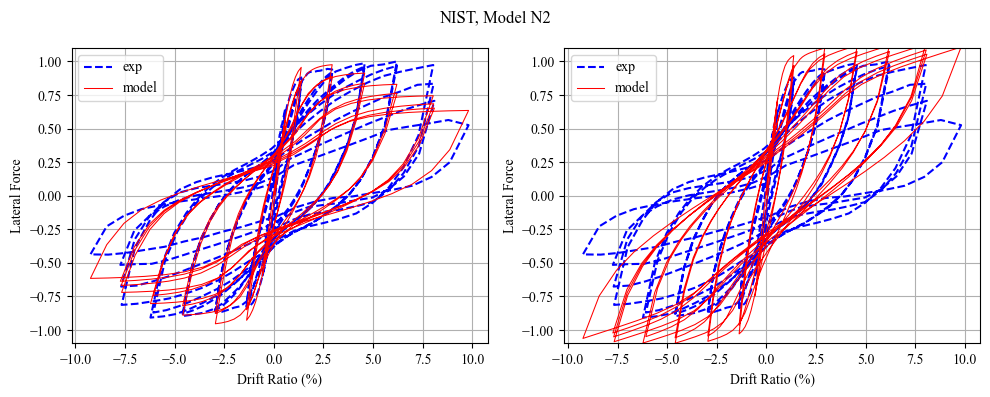



Name not found
C:\Users\Miguel.MIGUEL-DESK\Documents\GitHub\RC_Column_Model\quoFEM_Surrogate\scInput.json
1
[1.340101875, 0.6664927409784579, 0.9613171239234584, 0.32531355960007, 0.4898504117421834, 1.7874099954840088, 1.014533278632454, 0.503403300288688, 5.000532387172406, 0.010676249873611878, 3.1572500621168555, 0.4125896518052652, 0.004605096762134608, 0.7495622288725281]


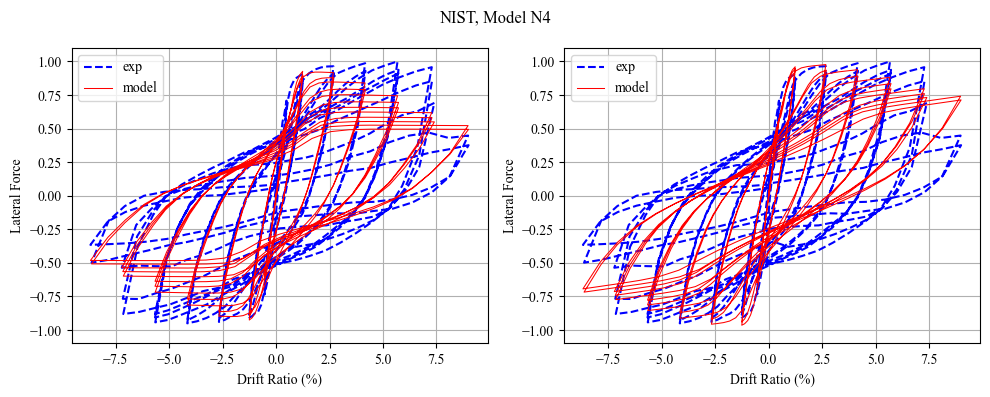



C:\Users\Miguel.MIGUEL-DESK\Documents\GitHub\RC_Column_Model\quoFEM_Surrogate\scInput.json
1
[1.340101875, 1.7139899201932582, 1.0084349929863974, 0.3265449338514891, 0.3903085654163379, 1.66251120811744, 1.3018386715007708, 0.6068851567956756, 2.7813693577036362, 0.010676249875119231, 4.254763153765543, 0.3999399150961177, 0.009068815147095502, 0.7023321518602308]


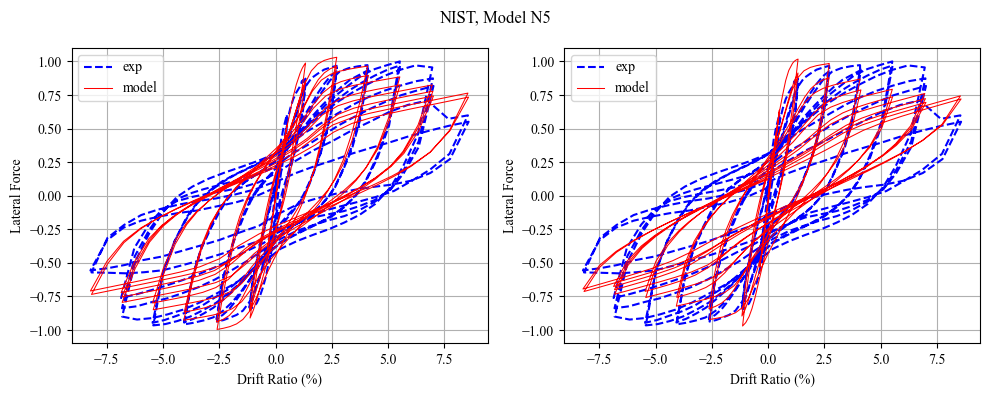



C:\Users\Miguel.MIGUEL-DESK\Documents\GitHub\RC_Column_Model\quoFEM_Surrogate\scInput.json
1
[1.340101875, 1.7192676290334552, 1.01197570120289, 0.37316856945353977, 0.5318408535002161, 1.6223495009349589, 1.3302847231843176, 0.6319191544031352, 2.2501617261204157, 0.010676249921287125, 4.550222202583939, 0.896436087524558, 0.0034173055746575076, 0.7091658010215113]


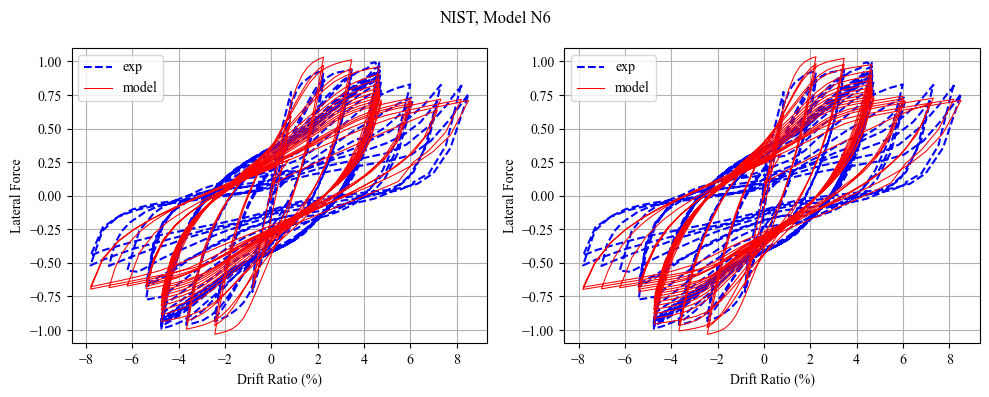



C:\Users\Miguel.MIGUEL-DESK\Documents\GitHub\RC_Column_Model\quoFEM_Surrogate\scInput.json
1
[1.340101875, 0.7797340347251331, 0.9933152649338344, 0.33708551856775004, 0.5059492950270206, 1.374519073852889, 0.9295597479921623, 0.5686763671065702, 5.822694607962852, 0.01067624987501645, 3.024068457989552, 0.3926349247144049, 0.004641552254563421, 1.3383162409293645]


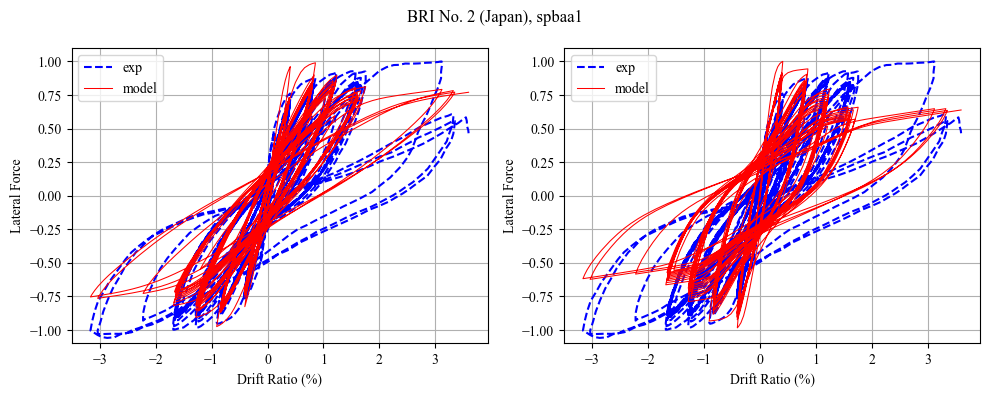



Name not found
Name not found
Name not found
C:\Users\Miguel.MIGUEL-DESK\Documents\GitHub\RC_Column_Model\quoFEM_Surrogate\scInput.json
1
[1.340101875, 1.2736251228435322, 1.025222064604258, 0.33899593678755413, 0.2650437641428755, 1.4038719047304822, 1.38638157398743, 0.8434176376674415, 3.092594988663766, 0.010676249878817653, 5.437300051004997, 0.5152368639370196, 0.0038811653038793104, 0.9224560600597568]


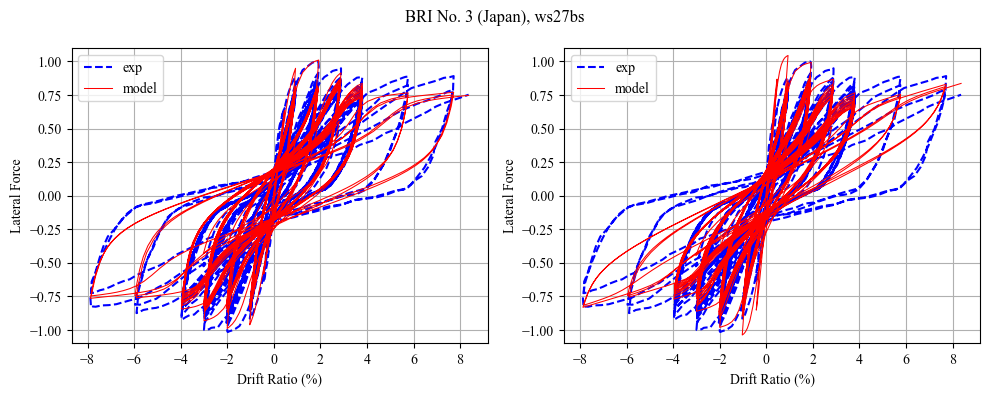



Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
C:\Users\Miguel.MIGUEL-DESK\Documents\GitHub\RC_Column_Model\quoFEM_Surrogate\scInput.json
1
[1.340101875, 1.049522088558753, 1.0040010085829612, 0.38390181277953256, 0.35163578946058793, 1.333327586337072, 0.8602495552797081, 0.8996374877075533, 3.3429101581169616, 0.010676249885805055, 5.719791733477785, 0.6673620435528524, 0.001233625795866453, 0.5174867005854982]


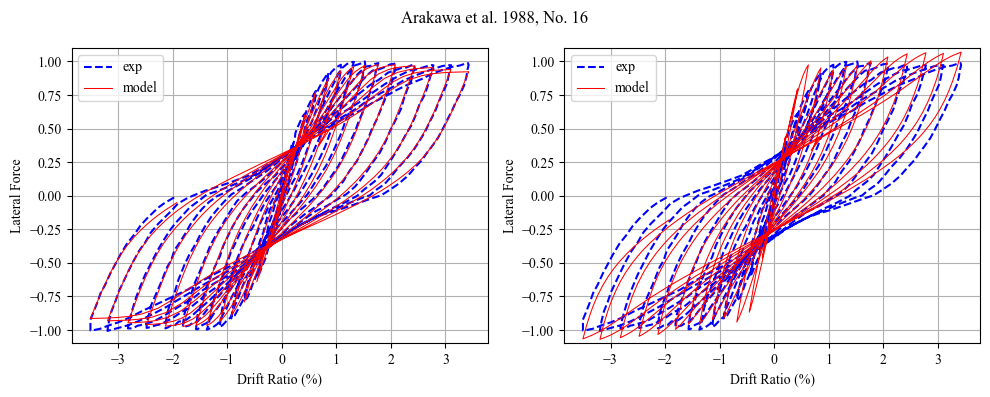



Name not found
Name not found
Name not found
C:\Users\Miguel.MIGUEL-DESK\Documents\GitHub\RC_Column_Model\quoFEM_Surrogate\scInput.json
1
[1.340101875, 1.0429931939944648, 0.9824622763755192, 0.3732082226082522, 0.4435924443957639, 1.3431917827342807, 2.122507405274749, 0.9159927774628287, 3.663256833106667, 0.010676249894208022, 3.9638652350664625, 0.3870680948921384, 0.0027991759029116175, 0.5985265140161209]


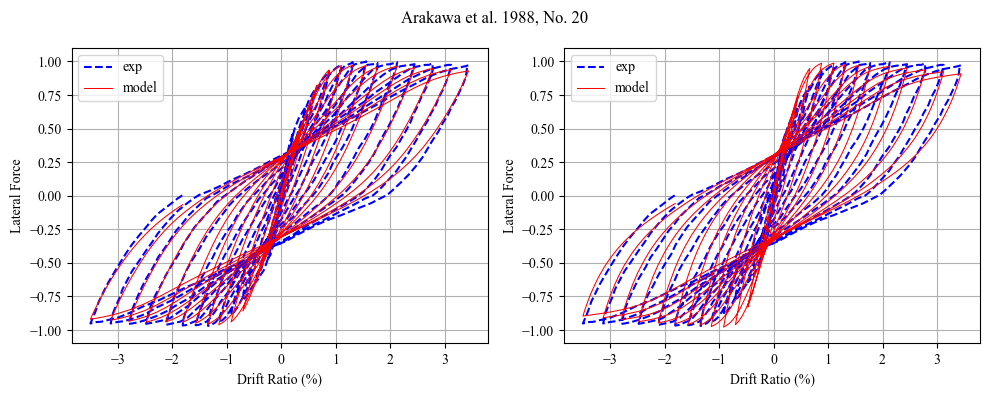



C:\Users\Miguel.MIGUEL-DESK\Documents\GitHub\RC_Column_Model\quoFEM_Surrogate\scInput.json
1
[1.340101875, 1.0451616844219374, 1.0363821165547544, 0.3934085183672163, 0.38169697826579796, 1.3191889590019046, 0.8185591366854719, 0.7820617829172354, 6.044022445398157, 0.010676249887204347, 3.845557587439826, 0.4103364867601712, 0.0016163564077675053, 0.7822248037915408]


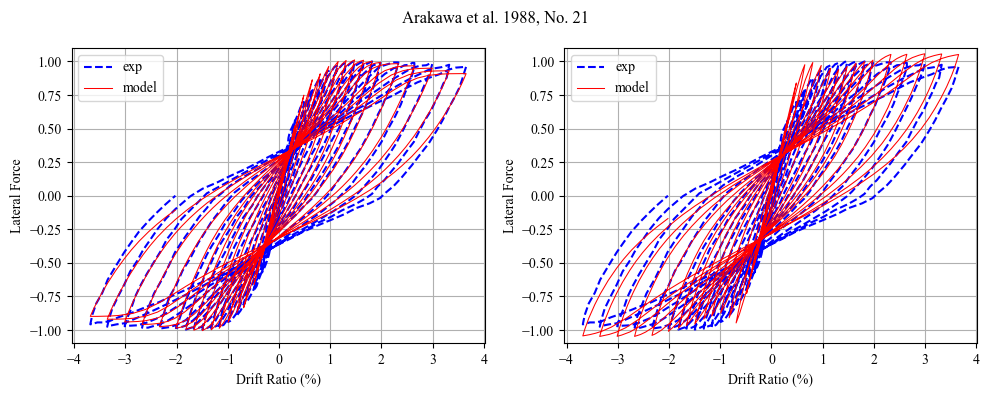



Name not found
Name not found
Name not found
C:\Users\Miguel.MIGUEL-DESK\Documents\GitHub\RC_Column_Model\quoFEM_Surrogate\scInput.json
1
[1.340101875, 1.0423314157484747, 1.0110966176291343, 0.6141883546735643, 0.899514089522014, 1.3636468147310798, 0.47520918992566186, 0.9058535058414678, 6.010993985378343, 0.010676249983580573, 4.164951426954864, 0.7644328741811585, 0.007621149487287404, 0.8767004732231939]


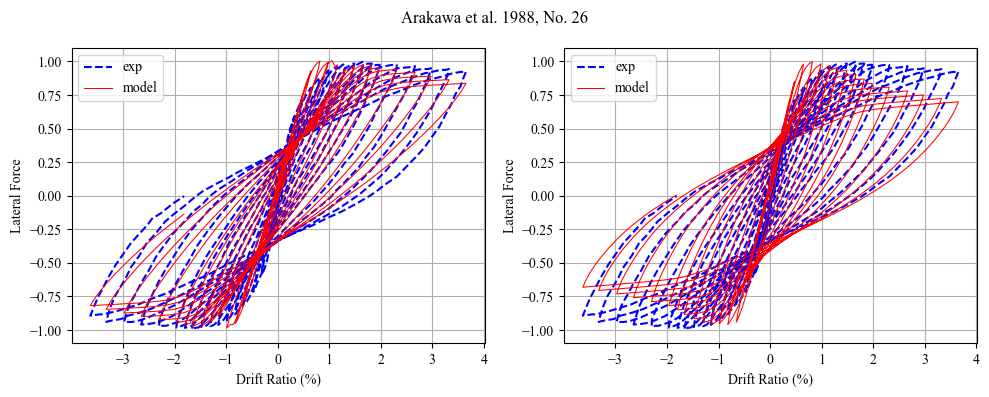



Name not found
Name not found
C:\Users\Miguel.MIGUEL-DESK\Documents\GitHub\RC_Column_Model\quoFEM_Surrogate\scInput.json
1
[1.340101875, 1.225277593310071, 1.0142777288361906, 0.3614766091029806, 0.8117093502103645, 1.4259217806054967, 1.7770164879988124, 0.5236143318661202, 2.57079469904844, 0.010676249926830422, 3.773730147834857, 0.6069174215706685, 0.006721711520333982, 0.7621850426074339]


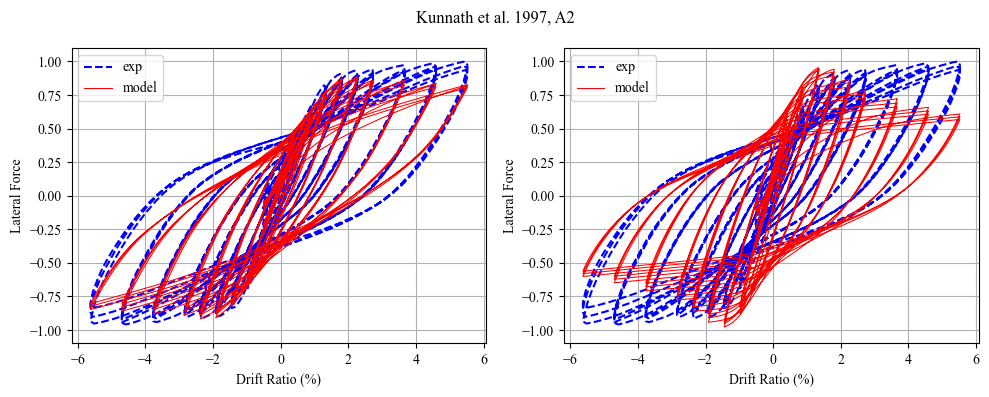



Name not found
Name not found
Name not found
Name not found
C:\Users\Miguel.MIGUEL-DESK\Documents\GitHub\RC_Column_Model\quoFEM_Surrogate\scInput.json
1
[1.340101875, 1.2563684535796955, 0.9899855128343614, 0.3598956507534673, 0.651462776325518, 1.6119442067041414, 2.6409513681170735, 0.7437007161689696, 3.7059283485621095, 0.01067624987196802, 4.6297661843686395, 0.5588133353202164, 0.006154147745839877, 0.6177889593764898]


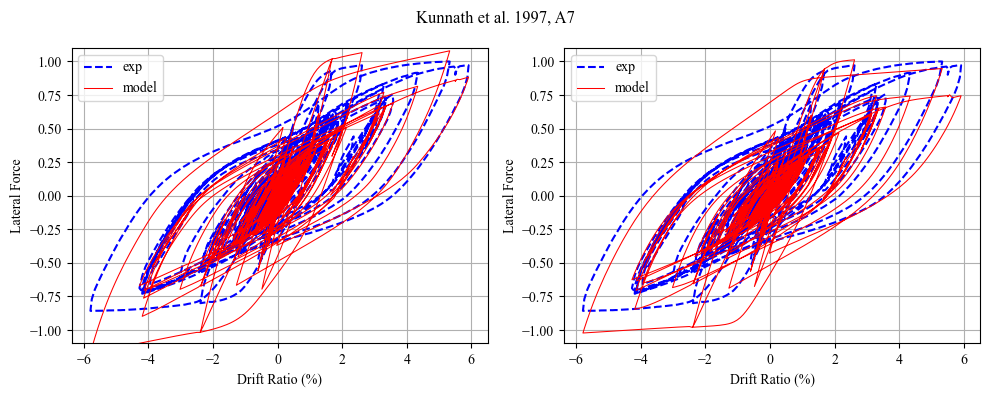



C:\Users\Miguel.MIGUEL-DESK\Documents\GitHub\RC_Column_Model\quoFEM_Surrogate\scInput.json
1
[1.340101875, 1.438106692122668, 1.0069842957919721, 0.32236879287192843, 0.7727693546716091, 1.8969545010874718, 0.998610815476958, 0.7092247574126633, 4.3813920737153405, 0.010676249872695987, 4.131199126240857, 0.4855709770076512, 0.0016961662275947515, 0.7303533810525009]


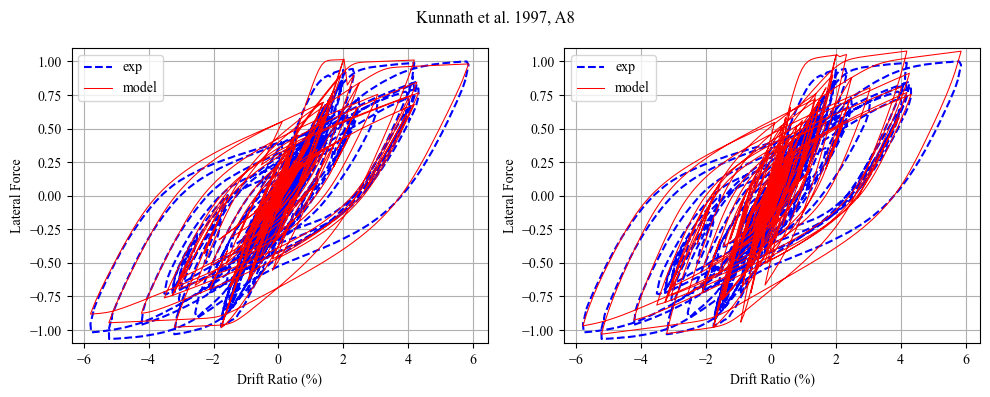



C:\Users\Miguel.MIGUEL-DESK\Documents\GitHub\RC_Column_Model\quoFEM_Surrogate\scInput.json
1
[1.340101875, 1.438106692122668, 1.0069842957919721, 0.32236879287192843, 0.7727693546716091, 1.8969545010874718, 0.998610815476958, 0.7092247574126633, 4.3813920737153405, 0.010676249872695987, 4.131199126240857, 0.4855709770076512, 0.0016961662275947515, 0.7303533810525009]


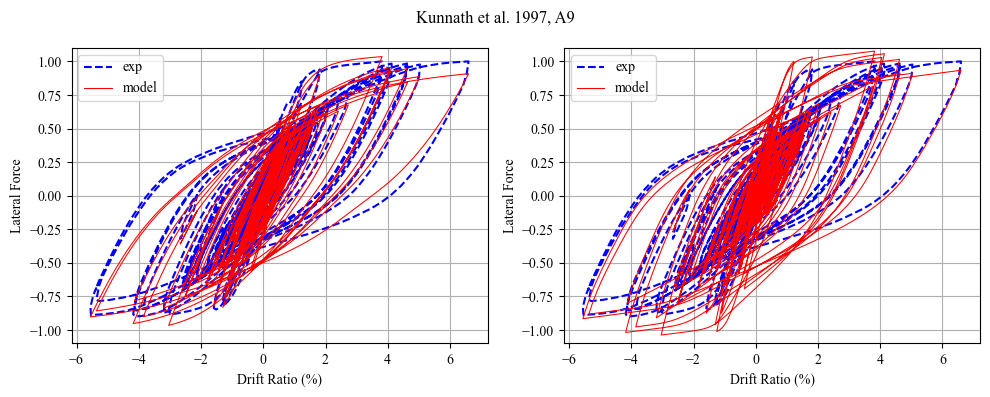



C:\Users\Miguel.MIGUEL-DESK\Documents\GitHub\RC_Column_Model\quoFEM_Surrogate\scInput.json
1
[1.340101875, 1.4608164825072443, 1.0011205281782092, 0.31930939114874113, 0.7812497298309193, 1.8268930780633608, 0.9404989374348565, 0.7055674067114094, 4.462863087956981, 0.010676249872804217, 4.071776131127631, 0.47959587935797915, 0.011656436533625981, 0.7778935734900967]


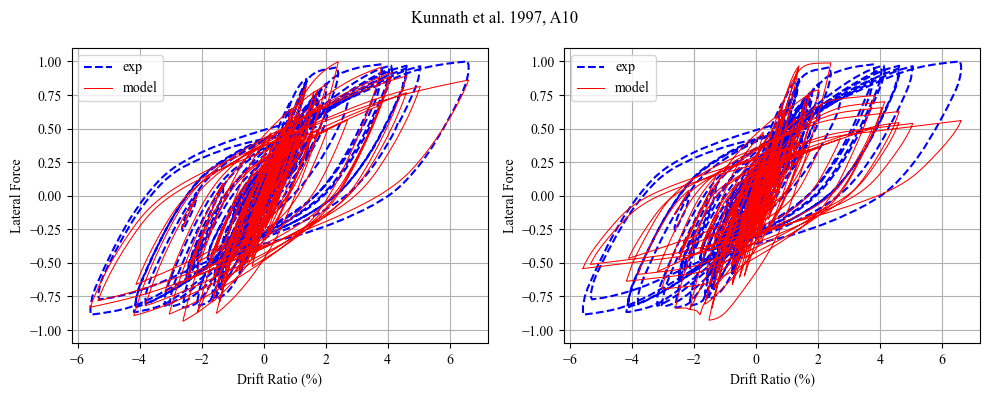



C:\Users\Miguel.MIGUEL-DESK\Documents\GitHub\RC_Column_Model\quoFEM_Surrogate\scInput.json
1
[1.340101875, 1.9273009945342663, 0.9599401519708421, 0.3107652840765341, 0.700057712708263, 1.7099160394769064, 2.5461010651066145, 0.6790537449450109, 5.171230983856553, 0.010676249873869859, 3.123743167266885, 0.4149076701110476, 0.0009693755003049344, 0.6874462096682229]


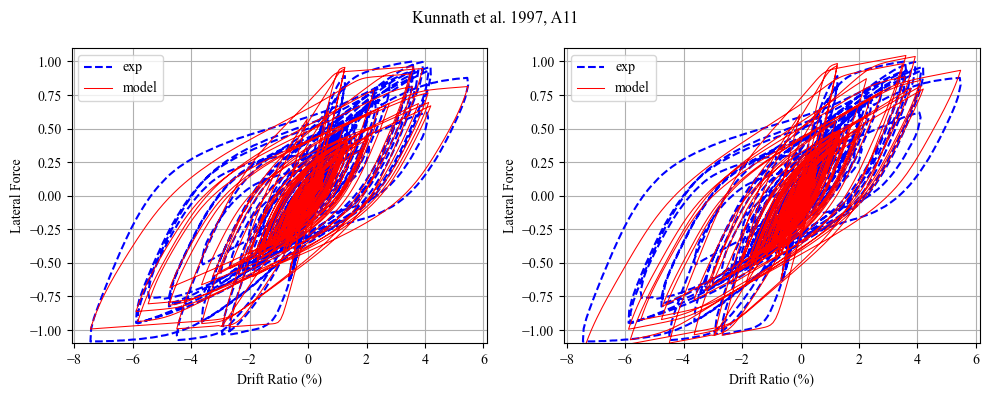



Name not found
Name not found
Name not found
C:\Users\Miguel.MIGUEL-DESK\Documents\GitHub\RC_Column_Model\quoFEM_Surrogate\scInput.json
1
[1.340101875, 0.882581006490673, 0.9874227866900965, 0.42831915618551153, 0.7676183069001317, 1.3391946941081307, 1.1297526158097562, 0.8801050738651405, 4.712043952220424, 0.010676249875338342, 4.897216881285783, 1.0902140199612322, 0.00459301501976157, 1.5800736582810448]


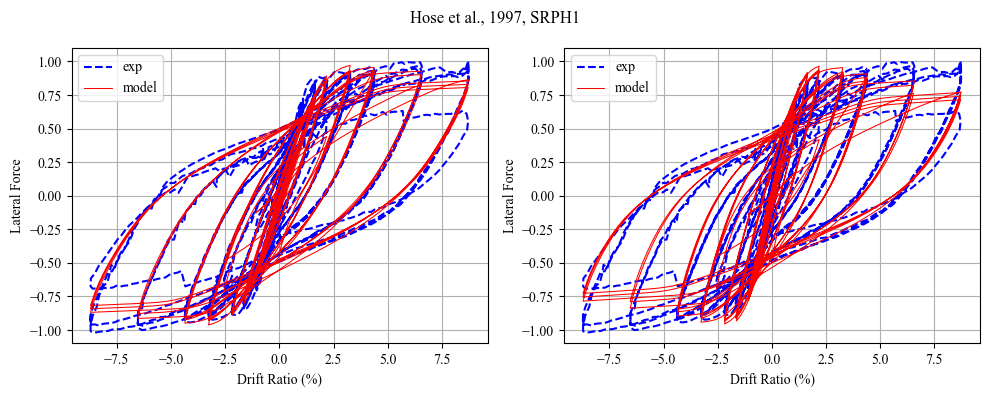



C:\Users\Miguel.MIGUEL-DESK\Documents\GitHub\RC_Column_Model\quoFEM_Surrogate\scInput.json
1
[1.340101875, 0.6291023422419969, 1.0146377821092802, 0.3304838286947247, 0.36488188781658015, 1.4518039577639055, 0.6440887305518892, 0.5012675982480592, 5.68202317365626, 0.01067624989009749, 3.36619260099803, 0.5239452917095394, 0.005406956275640641, 1.2400494466968945]


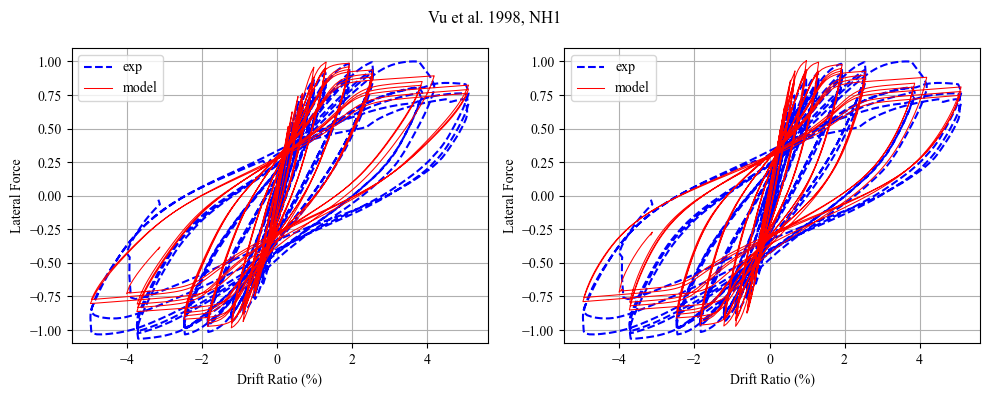



Name not found
C:\Users\Miguel.MIGUEL-DESK\Documents\GitHub\RC_Column_Model\quoFEM_Surrogate\scInput.json
1
[1.340101875, 1.2730365735566476, 0.9637629374722847, 0.31541301653834547, 0.32468719849445016, 1.9490323236444433, 2.0335845909802526, 0.5993044451507208, 3.42161053131078, 0.010676249874986839, 5.565731633118371, 0.49174590687134445, 0.000559143444616988, 0.7705203197138095]


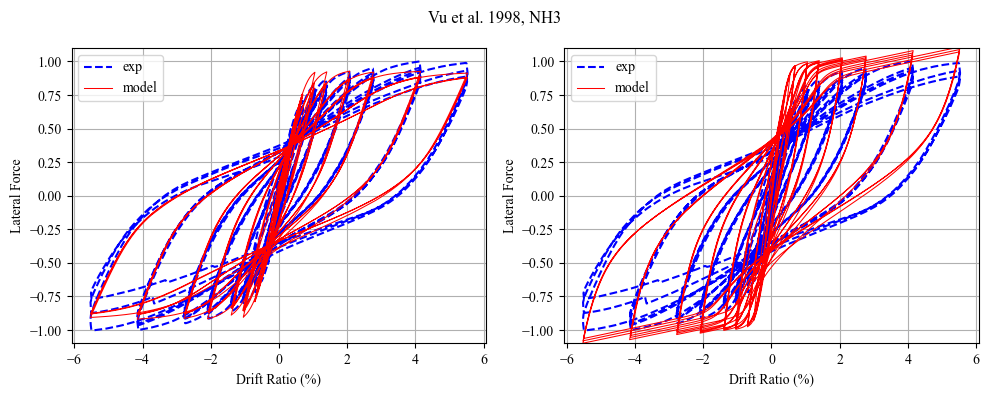



Name not found
Name not found
C:\Users\Miguel.MIGUEL-DESK\Documents\GitHub\RC_Column_Model\quoFEM_Surrogate\scInput.json
1
[1.340101875, 1.1371507088087396, 1.010225743932004, 0.36560580045972035, 0.5431117300773812, 1.5469733627706765, 0.7658513787594049, 0.6757411376107445, 2.21871117280912, 0.010676249873834231, 5.965692181274486, 0.46909492531207125, 0.004108575377045741, 0.8742169901939855]


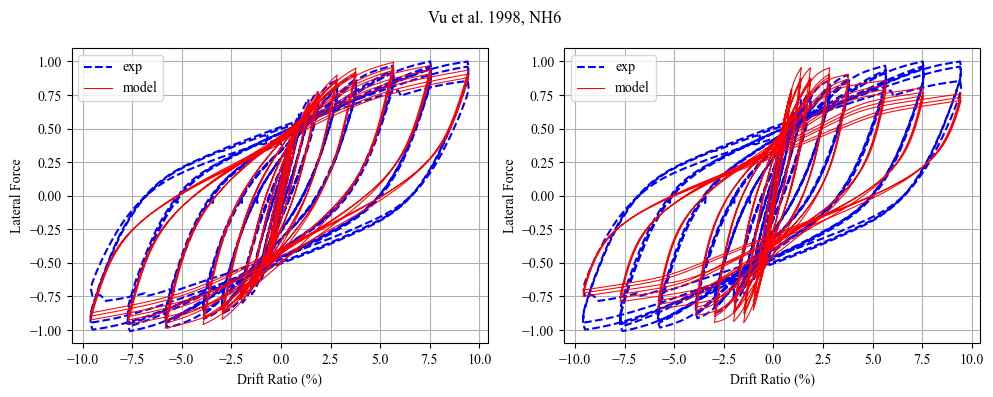



Name not found
C:\Users\Miguel.MIGUEL-DESK\Documents\GitHub\RC_Column_Model\quoFEM_Surrogate\scInput.json
1


In [ ]:
# Find where the input data is
cwd = os.getcwd()
allfiles = os.listdir(os.path.join(cwd, 'calibrated_curves_02'))

for file in allfiles[1::]:
    with open(os.path.join(cwd, 'calibrated_curves_02', file), 'r') as f:
        test_data = json.load(f)
    
    disp = test_data['data']['disp']
    force = test_data['data']['force']
    name = test_data['Name']

    try:
        # Find name in the Name column of the merged_data
        index = merged_data[merged_data['name'] == name].index[0]
    except:
        print('Name not found')
        continue

    # Extract the calibrated and nondimensional parameters for both training and testing
    cal_params = merged_data.iloc[index, cal_params_index]
    nondim_params = merged_data.iloc[index, nd_params_index]
    
    params_list = [["RV_column1", nondim_params.iloc[0]],
               ["RV_column2", nondim_params.iloc[1]],
               ["RV_column3", nondim_params.iloc[2]],
               ["RV_column4", nondim_params.iloc[3]],
               ["RV_column5", nondim_params.iloc[4]], 
               ["RV_column6", nondim_params.iloc[5]]
               ]
    
    # Here, call surrogate model
    try:
        params = main(params_list, [], surrogate_file, 'dummyout.out', input_json)
        gp_predicted = []
            
        for vals in params[0]:
            gp_predicted.append(vals)
        
        # Run the model
        plt.figure(figsize=(10, 4))
        plt.subplot(1,2,1)
        run_model(cal_params, test_data, show_plots=True)
        plt.ylim([-1.1, 1.1])

        # Now, plot the surrogate predictions
        print(gp_predicted)
        plt.subplot(1,2,2)
        run_model(gp_predicted, test_data, show_plots=True)
        plt.ylim([-1.1, 1.1])
        plt.suptitle(test_data['Name'])
        plt.tight_layout()
        plt.show()
        # cc += 1
        print('\n')
    except:
        print('Error')
        continue
    